### Problem statement

- To predict the spread of dengue disease based on climatic conditions specifically - humidity, temperature and precipitation levels. 

### Dataset
- The datasets are downloaded from  Tycho.pitt
https://www.tycho.pitt.edu/dataset/IN.38362002/#
- The dataset consists of climate data provided by U.S. environmental agencies and the total number of reported dengue patients in a weekly timescale. City and date indicators,This data describes the city that’s related to the data, and the starting date of the week of the data.
- Dataset contains: 1456 rows and 15 columns.
- It includes features like weather station measurements, precipitation measurements of satellite, climate forecast system reanalyzed measurements and vegetation index information.
- Target column is Total cases.


### Importing the libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Checking the versions of the packages imported
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)


numpy: 1.16.5
pandas: 0.25.1
seaborn: 0.9.0
matplotlib: 3.1.1


### Importing the dataset

In [3]:
xt = pd.read_csv('dengue_features_train.csv')
yt = pd.read_csv('dengue_labels_train.csv')
wt = pd.read_csv('dengue_features_test.csv')

In [4]:
#retrieving top 5 rows of the csv file
xt.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,32.00,73.365714,25.442857
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,17.94,77.368571,26.714286
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,26.10,82.052857,26.714286
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,13.90,80.337143,27.471429
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,12.20,80.460000,28.942857


In [5]:
#checking the total number of columns and rows in the given dataset.
xt.shape

(1456, 15)

In [6]:
#To display all the column names in the dataset
xt.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c'],
      dtype='object')

In [7]:
#To display the information of the columns.
xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 15 columns):
city                                    1456 non-null object
year                                    1456 non-null int64
weekofyear                              1456 non-null int64
week_start_date                         1456 non-null object
ndvi_ne                                 1262 non-null float64
ndvi_nw                                 1404 non-null float64
ndvi_se                                 1434 non-null float64
ndvi_sw                                 1434 non-null float64
precipitation_amt_mm                    1443 non-null float64
reanalysis_air_temp_k                   1446 non-null float64
reanalysis_avg_temp_k                   1446 non-null float64
reanalysis_dew_point_temp_k             1446 non-null float64
reanalysis_precip_amt_kg_per_m2         1446 non-null float64
reanalysis_relative_humidity_percent    1446 non-null float64
station_avg_temp_c             

In [8]:
#To display the statistical information of the columns
xt.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


### To Get total number of nullvalues in each column

In [9]:
xt.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                 194
ndvi_nw                                  52
ndvi_se                                  22
ndvi_sw                                  22
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
station_avg_temp_c                       43
dtype: int64

In [10]:
# Required columns
X = xt.iloc[:,4:].values
y = yt.iloc[:, 3].values
w = wt.iloc[:,4:].values

### Handling missing values

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer = imputer.fit(w)
w = imputer.transform(w)

### Splitting the dataset into training and test data.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1164, 11)
(292, 11)
(1164,)
(292,)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [15]:
##The fit() function calculates the values of these parameters.
#The transform function applies the values of the parameters on the actual data and gives the normalized value.
#predict() : given a trained model, predict the label of a new set of data. 

### Linear Regressor 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
pred = LR.predict(X_test)

In [18]:
test_set_rmse_LR = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2_LR = r2_score(y_test, pred)


In [19]:
print(test_set_rmse_LR)
print(test_set_r2_LR)

42.41933699083568
0.12752591219726783


In [20]:
# Note that for rmse, the lower that value is, the better the fit
# for r2 The closer towards 1, the better the fit.

### MLP - Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

MLPClassifier()

In [22]:
y_pred = MLP.predict(w)

In [23]:
predictions = MLP.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MLP: ", val4*10, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))

*Accuracy score for MLP:  71.91780821917808 

*Confusion Matrix for MLP: 
[[15  0  1 ...  0  0  0]
 [ 7  0  4 ...  0  0  0]
 [10  0  4 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.10      0.75      0.17        20
           1       0.00      0.00      0.00        15
           2       0.06      0.24      0.10        17
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        10
           5       0.08      0.06      0.07        16
           6       0.00      0.00      0.00        20
           7       0.04      0.08      0.05        13
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        10
          12       0.00      0.00 

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine 

In [24]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)

In [25]:
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1*10, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  68.4931506849315 

*Confusion Matrix for SVM: 
[[20  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [17  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        20
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        10
          12       0.00      0.00  

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=300,random_state=0)
RF.fit(X,y)

RandomForestRegressor(n_estimators=300, random_state=0)

In [30]:
# Predicting a new result
y_pred = RF.predict(X_test)

In [31]:
test_set_rmse_RF = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2_RF = r2_score(y_test, y_pred)

In [32]:
print(test_set_rmse_RF)
print(test_set_r2_RF)

13.768855556128678
0.9080777866929082


C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


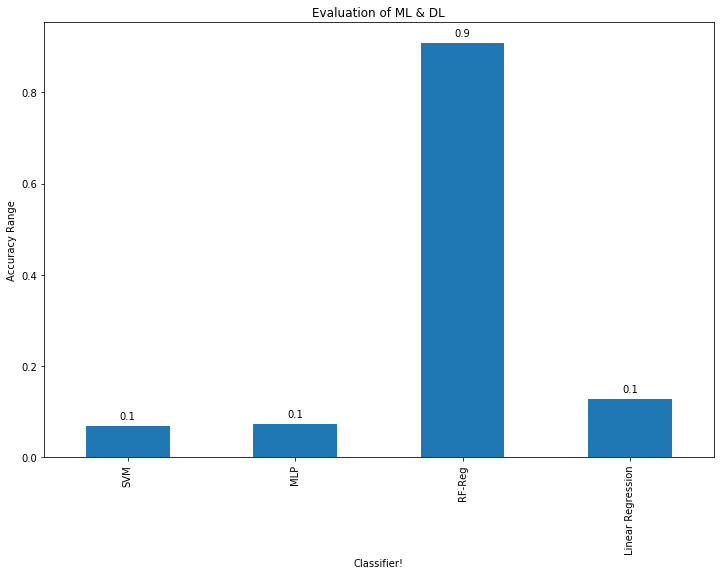

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1/100,val4/100,test_set_r2_RF,test_set_r2_LR]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['SVM', 'MLP','RF-Reg','Linear Regression']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

### Testing the model using random data

In [34]:
random_data=[[-0.0189,-0.0189,0.1027286,0.0912,78.6,298.4928571,298.55,294.5271429,25.37,78.78142857,26.52857143]]
random_data1=RF.predict(random_data)
random_data1

array([16.23])